## Goal:
### Predict the diabetes dataset by applying various classifiers and see which one gives the best result.
## Source:
### Diabetes dataset from Kaggle

#### Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import the dataset

In [3]:
dataset = pd.read_csv('diabetes.csv')
dataset.shape

(768, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check for missing values

In [5]:
dataset.isnull().values.sum()

0

In [6]:
def check_zeros(dataset, feature):
    count = len(dataset.loc[dataset[feature]==0])
    print('Number of zeros rows in {} is {}'.format(feature, count))

### From the dataset we can see many number of zeros across the features. so figure out how many number of zeros exists in each feature for the whole dataset

In [7]:
for i in dataset.columns:
    check_zeros(dataset, i)

Number of zeros rows in Pregnancies is 111
Number of zeros rows in Glucose is 5
Number of zeros rows in BloodPressure is 35
Number of zeros rows in SkinThickness is 227
Number of zeros rows in Insulin is 374
Number of zeros rows in BMI is 11
Number of zeros rows in DiabetesPedigreeFunction is 0
Number of zeros rows in Age is 0
Number of zeros rows in Outcome is 500


### Replace the zeros with median value in all independent features

In [8]:
for i in dataset.columns:
    if i != 'Outcome':
        dataset[i] = dataset[i].replace(0, dataset[i].median())

In [9]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


### Check if the dataset is balanced. Here dataset is not balanced. 

In [10]:
dataset.groupby('Outcome')['Age'].count()

Outcome
0    500
1    268
Name: Age, dtype: int64

### Find the correlation between the feautres. IF any feature is highly correlated then we can remove that feature.

<AxesSubplot:>

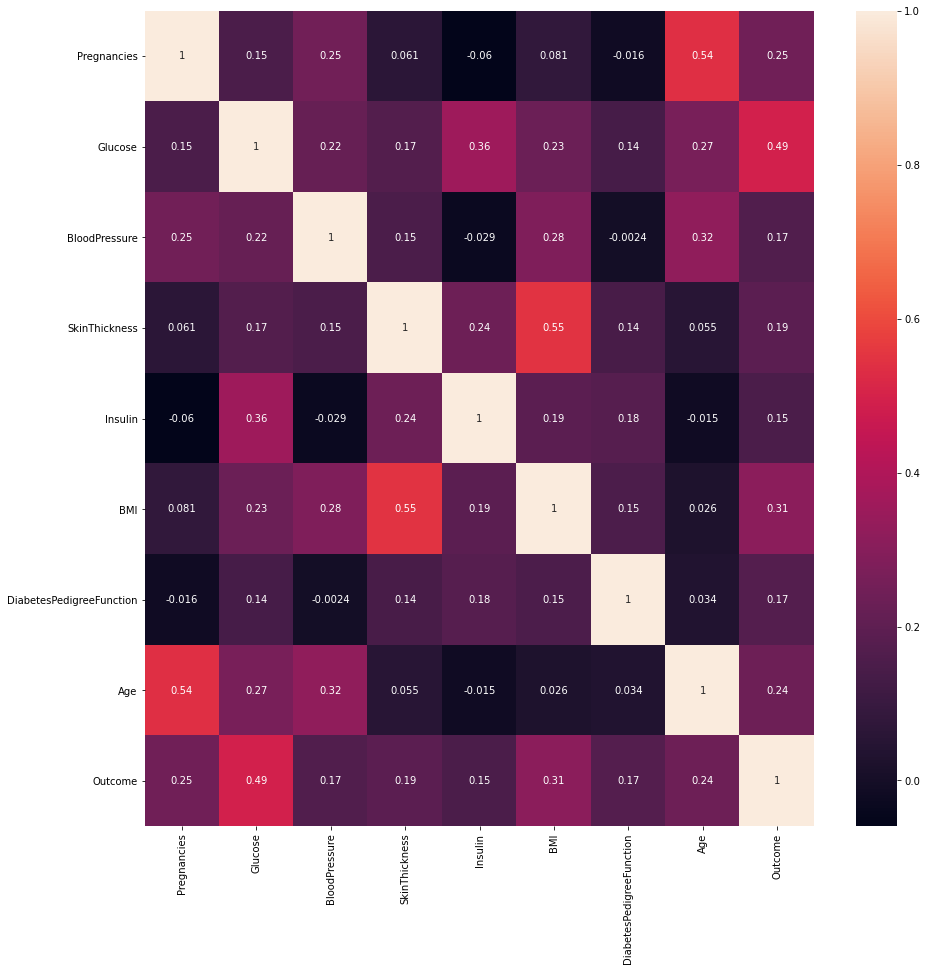

In [11]:
##correlation
corrmatrix = dataset.corr()
corr_features = corrmatrix.index
plt.figure(figsize = (15,15))
sns.heatmap(dataset[corr_features].corr(), annot = True)

In [12]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


### From the correlation graph and table, we dont see any feature which are highly correlated. So we can retain all the features of the dataset

In [13]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

### Apply features scaling and put all the indepenedent features on the same scale

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

### Peform train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3, random_state = 0)

### As the dataset is imbalanced, perform oversampling to balance the dataset

In [16]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(0.75)
os_data_x, os_data_y = sm.fit_resample(xtrain, ytrain)

### We will train the ML model in many classification algorithms and we will compare the scores of them

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from lightgbm import LGBMClassifier
import xgboost as xgb
import catboost as cb

### Logistic regression

In [18]:
log_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']}
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5)
log_model.fit(os_data_x, os_data_y)
log_predict = log_model.predict(xtest)
log_cm = confusion_matrix(ytest, log_predict)
log_score = log_model.best_score_

### K-Nearest neighbor classifier

In [19]:
# knn
knn_params = {'n_neighbors': list(range(3, 20, 2)),
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_model.fit(os_data_x, os_data_y)
knn_predict = knn_model.predict(xtest)
knn_cm = confusion_matrix(ytest, knn_predict)
knn_score = knn_model.best_score_

### Support Vector classifier

In [20]:
# svc
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5)
svc_model.fit(os_data_x, os_data_y)
svc_predict = svc_model.predict(xtest)
svc_cm = confusion_matrix(ytest, svc_predict)
svc_score = svc_model.best_score_

### Decision tree classifier

In [21]:
# dt
dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_model.fit(os_data_x, os_data_y)
dt_predict = dt_model.predict(xtest)
dt_cm = confusion_matrix(ytest, dt_predict)
dt_score = dt_model.best_score_

### Random Forest classifier

In [22]:
# rf
rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 26, 5)),
             'max_depth': list(range(3, 20, 2))}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(os_data_x, os_data_y)
rf_predict = rf_model.predict(xtest)
rf_cm = confusion_matrix(ytest, rf_predict)
rf_score = rf_model.best_score_

### Stochastic gradient descent classifier

In [23]:
# sgd
sgd_params = {'loss' : ['hinge', 'log', 'squared_hinge', 'modified_huber'],
              'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'penalty' : ['l2', 'l1', 'none']}
sgd_model = GridSearchCV(SGDClassifier(max_iter=10000), sgd_params, cv=5)
sgd_model.fit(os_data_x, os_data_y)
sgd_predict = sgd_model.predict(xtest)
sgd_cm = confusion_matrix(ytest, sgd_predict)
sgd_score = sgd_model.best_score_


### LightGBM classifier

In [24]:
# lgb
lgb_params = {'n_estimators': [5, 10, 15, 20, 25, 50, 100],
                   'learning_rate': [0.01, 0.05, 0.1],
                   'num_leaves': [7, 15, 31],
                  }
lgb_model = GridSearchCV(LGBMClassifier(), lgb_params, cv=5)
lgb_model.fit(os_data_x, os_data_y)
lgb_predict = lgb_model.predict(xtest)
lgb_cm = confusion_matrix(ytest, lgb_predict)
lgb_score = lgb_model.best_score_

### XG Boost classifier

In [25]:
# xg
xgb_params = {'max_depth': [3, 5, 7, 9],
              'n_estimators': [5, 10, 15, 20, 25, 50, 100],
              'learning_rate': [0.01, 0.05, 0.1]}
xgb_model = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), xgb_params, cv=5)
xgb_model.fit(os_data_x, os_data_y)
xgb_predict = xgb_model.predict(xtest)
xgb_cm = confusion_matrix(ytest, xgb_predict)
xgb_score = xgb_model.best_score_

### Cat Boost classifier

In [26]:
# cb
cb_params = {'learning_rate': [0.01, 0.05, 0.1],
             'depth': [3, 5, 7, 9]}
cb_model = GridSearchCV(cb.CatBoostClassifier(verbose=False), cb_params, cv=5)
cb_model.fit(os_data_x, os_data_y)
cb_predict = cb_model.predict(xtest)
cb_cm = confusion_matrix(ytest, cb_predict)
cb_score = cb_model.best_score_

### Sort the scores of various models

In [27]:
models = ['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 
          'RandomForestClassifier', 'SGDClassifier', 'LGBMClassifier', 'XGBClassifier', 'CatBoostClassifier']
scores = [log_score, knn_score, svc_score, dt_score, rf_score, sgd_score, lgb_score, xgb_score, cb_score]
score_table = pd.DataFrame({'Model':models, 'Score':scores})
score_table.sort_values(by='Score', axis=0, ascending=False)

,Model,Score
1,KNeighborsClassifier,0.824652
4,RandomForestClassifier,0.821033
8,CatBoostClassifier,0.819198
6,LGBMClassifier,0.808155
7,XGBClassifier,0.808155
5,SGDClassifier,0.796942
2,SVC,0.795141
3,DecisionTreeClassifier,0.789738
0,LogisticRegression,0.785916


## Summary: From the above results, we can conclude that KNN Classifier predicts well for this diabetes dataset.